In [1]:
from datetime import datetime
print('Results last refreshed on ' + datetime.now().isoformat())

Results last refreshed on 2020-08-19T10:29:06.331880


In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
flat = spark.sql('select * from awight.template_survey_flat_answers')

In [4]:
def plot_votes(group_no, responses):
  ax = flat \
    .where(flat['group_no'] == group_no) \
    .toPandas()['answer'] \
    .value_counts() \
    .sort_index() \
    .plot.bar(figsize=(12,4))
  ax.set_xlabel('Prototype ' + str(group_no))
  ax.set_ylabel('Votes')
  ax.plot()

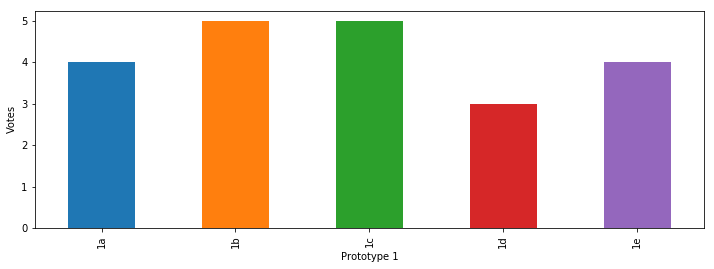

In [5]:
plot_votes(1, flat)

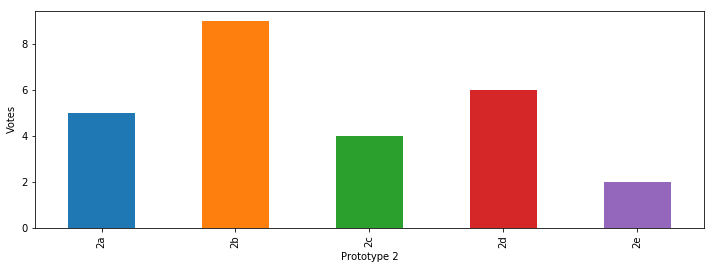

In [6]:
plot_votes(2, flat)

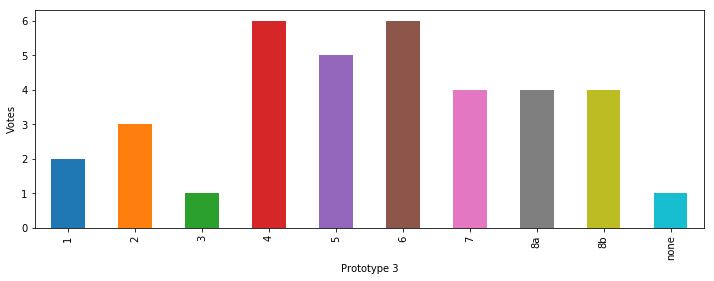

In [7]:
plot_votes(3, flat)

In [8]:
responses = spark.sql('select * from awight.template_survey_responses')

[]

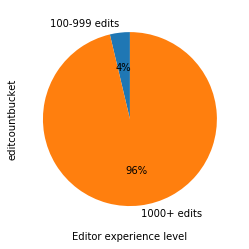

In [9]:
ax = responses \
    .toPandas()['editcountbucket'] \
    .value_counts() \
    .sort_index() \
    .plot.pie(figsize=(12,4), startangle=90, autopct='%1.0f%%')
ax.set_xlabel('Editor experience level')
ax.plot()

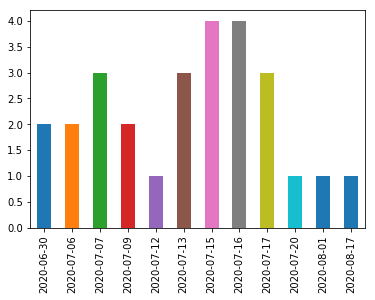

In [10]:
raw = spark.sql('select * from awight.template_survey_responses')
raw = raw.toPandas()
raw['dt'] = pd.to_datetime(raw['dt'])
raw.set_index('dt', inplace=True)
counts = raw.groupby(raw.index.date).count()['wiki']
counts.plot(kind='bar')

In [2]:
participants = spark.sql("""
select
    count(distinct(surveysessiontoken)) as participants,
    wiki
from awight.template_survey_responses
group by
    wiki
""")
participants.show()

+------------+--------+
|participants|    wiki|
+------------+--------+
|           9|  dewiki|
|           5|metawiki|
+------------+--------+



In [2]:
totals = spark.sql("""
select *
from awight.template_survey_totals
order by group_no, answer
""")
totals.show()

+--------+------+---+
|group_no|answer|_c2|
+--------+------+---+
|       1|    1a|  4|
|       1|    1b|  5|
|       1|    1c|  5|
|       1|    1d|  3|
|       1|    1e|  4|
|       2|    2a|  5|
|       2|    2b|  9|
|       2|    2c|  4|
|       2|    2d|  6|
|       2|    2e|  2|
|       3|     1|  2|
|       3|     2|  3|
|       3|     3|  1|
|       3|     4|  6|
|       3|     5|  5|
|       3|     6|  6|
|       3|     7|  4|
|       3|    8a|  4|
|       3|    8b|  4|
|       3|  none|  1|
+--------+------+---+



In [ ]:
# FIXME: Use the same data source as the pageviews REST API.

a = spark.sql("""
select
  sum(view_count)
from 
  wmf.pageview_hourly
where
  year = 2020
  and ((month = 7 and day >= 7) or (month > 7))
  and agent_type = "user"
  and project = "de.wikipedia"
  and page_title = "Wikipedia:Technische_Wünsche/Topwünsche/Leichter_mit_Vorlagen_arbeiten"
""")
a.show()

In [ ]:
b = spark.sql("""
select
  sum(view_count)
from 
  wmf.pageview_hourly
where
  year = 2020
  and ((month = 6 and day >= 30) or (month > 6))
  and agent_type = "user"
  and project = "meta"
  and page_title = "WMDE_Technical_Wishes/Templates"
""")
b.show()